<a href="https://colab.research.google.com/github/Ranjankraj/Shala/blob/main/TF2_LiR_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import tensorflow as tf

print(tf.__version__)

2.4.0


In [15]:
import numpy as np

X_data = 2 * np.random.rand(100,1)
y_value = 3 * X_data + 4 + np.random.rand(100,1)

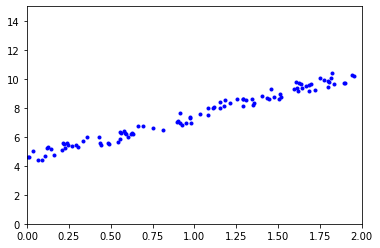

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(X_data, y_value, 'b.')
plt.axis([0,2, 0,15])
plt.show() 

In [17]:
def linear_regression(X, W, b):   #LiR model eq is y = WX + b
  return tf.add(tf.matmul(W,X), b)      #we can also write W*X + b as it's operator overloading

def mean_square(y_pred, y_true):
  return tf.reduce_mean(tf.square(y_pred, y_true))

In [18]:
learning_rate = 0.01
optimizer = tf.optimizers.SGD(learning_rate)

def run_optimization(X, y, W, b):
  
  with tf.GradientTape() as g:
    pred = linear_regression(X, W, b)
    loss = mean_square(pred, y)

  gradients = g.gradient(loss, [W, b])

  optimizer.apply_gradients(zip(gradients, [W, b]))

In [20]:
training_steps = 1000
display_step = 50

W = tf.Variable(np.random.rand(), name='Weight')
b = tf.Variable(np.random.rand(), name='bias')

for steps in range(1, training_steps + 1):

  run_optimization(X_data, y_value, W, b)

  if step % display_step == 0:
    pred = linear_regression(X_data, W, b)
    loss = mean_square(pred, y_value)
    print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))